In [ ]:
!pip install datafold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import trustworthiness

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

from gensim.models import KeyedVectors
import random
import time

# Datafold Diffusion map on Swiss roll dataset (10k points)

(10000, 3)
<class 'numpy.ndarray'>


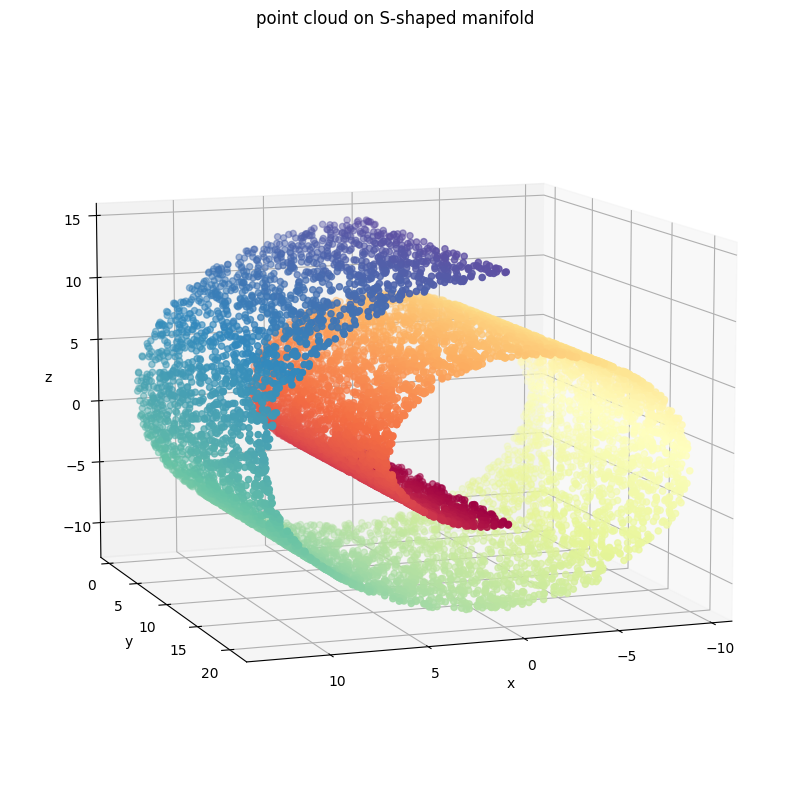

In [ ]:
rng = np.random.default_rng(1)
nr_samples = 10000

idx_plot = rng.permutation(nr_samples)[0:nr_samples]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)
print(X.shape)
print(type(X))

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [ ]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.24808115963081503, cut-off=2.137714630194762


(<Figure size 1500x1500 with 8 Axes>,
 array([[<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>]],
       dtype=object))

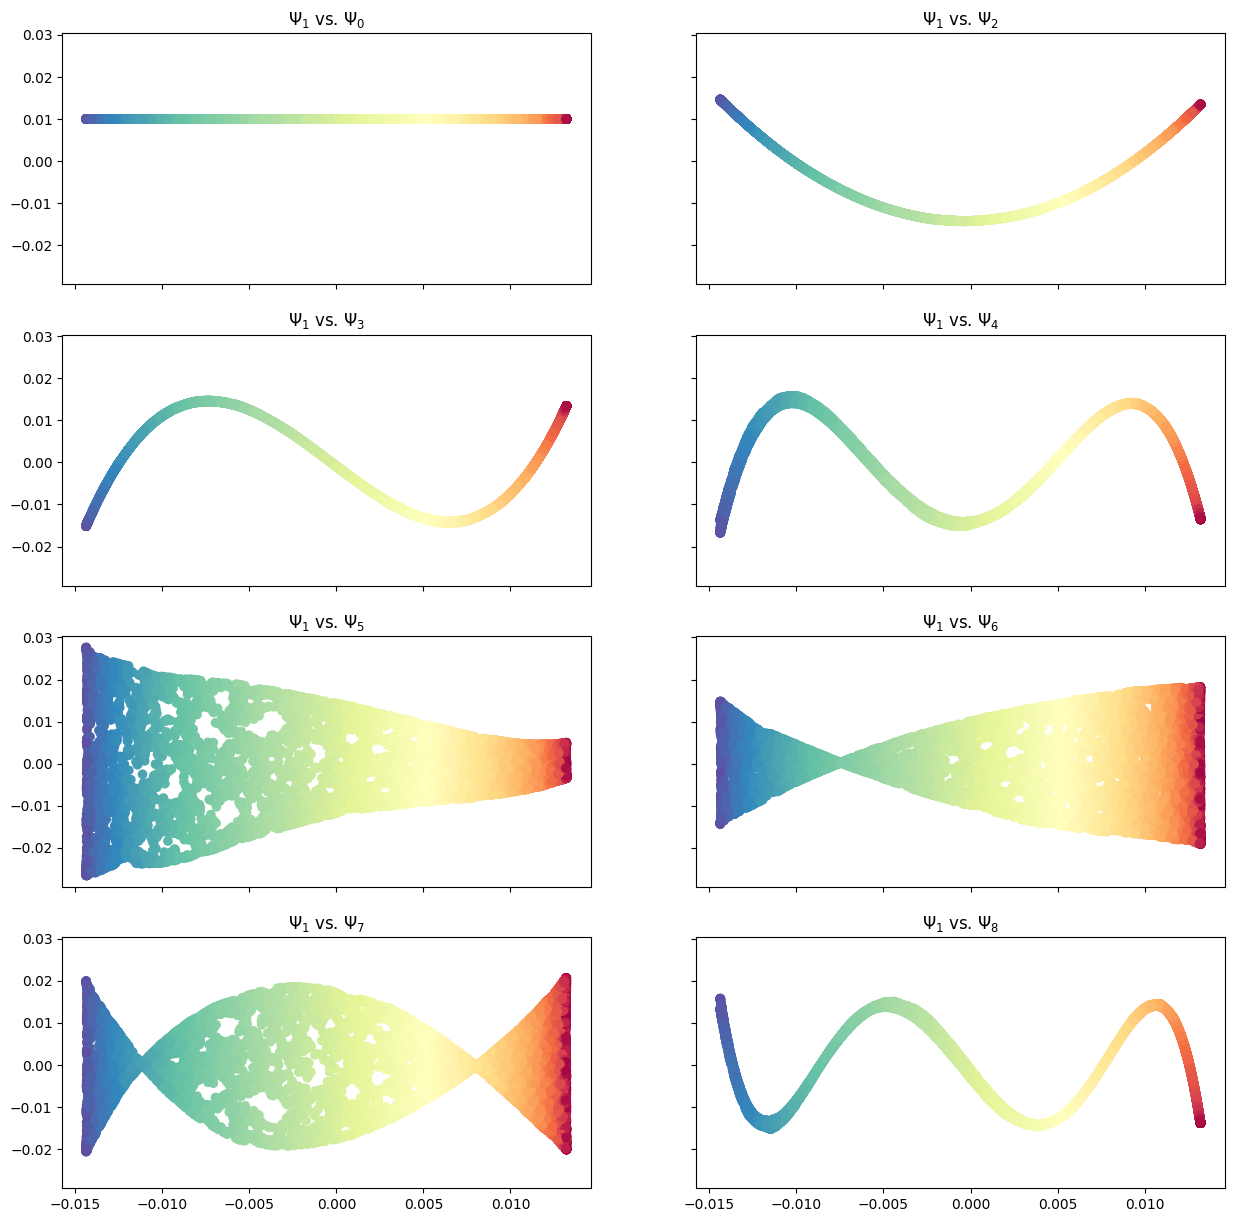

In [ ]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(
        epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
    ),
    n_eigenpairs=9,
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

In [ ]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


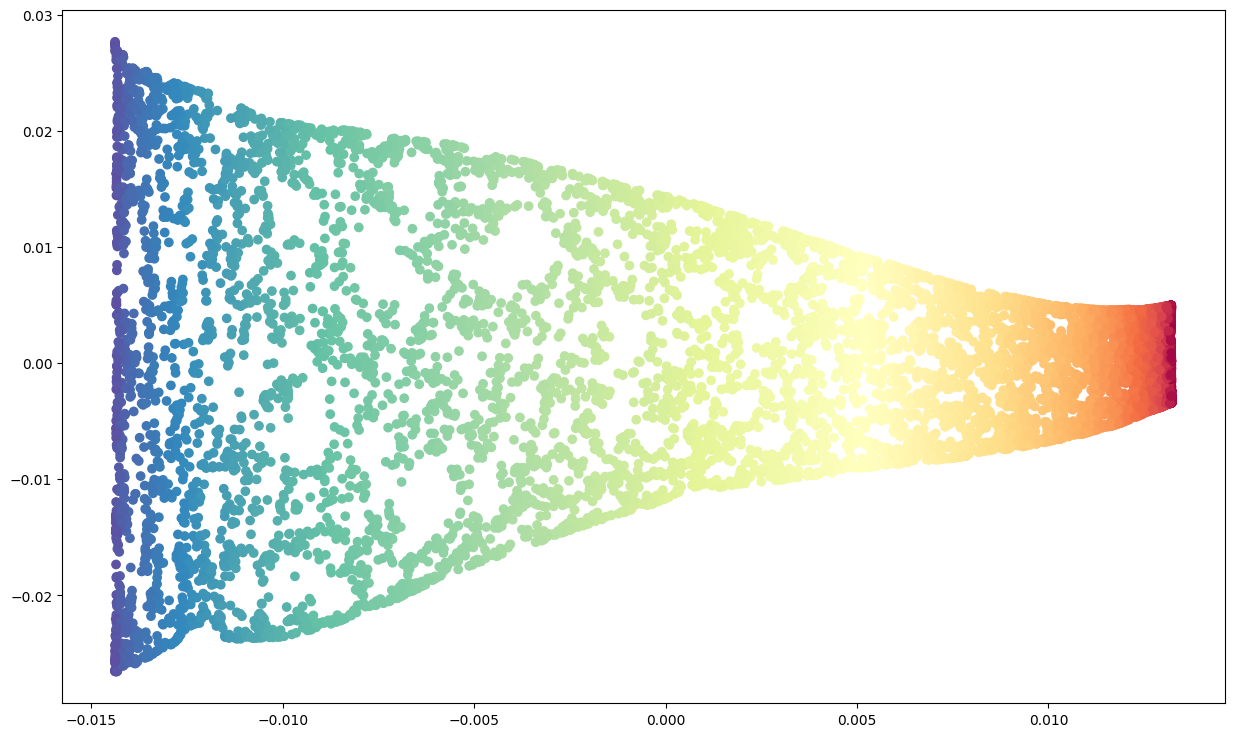

In [ ]:
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

In [ ]:
target_mapping.shape

(10000, 2)

In [ ]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(X), batch_size):
    s_curve_batch = X[i:i+batch_size]
    target_mapping_batch = target_mapping[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9993508446757406


# Datafold Diffusion map on Swiss roll dataset (100k points)

(100000, 3)
<class 'numpy.ndarray'>


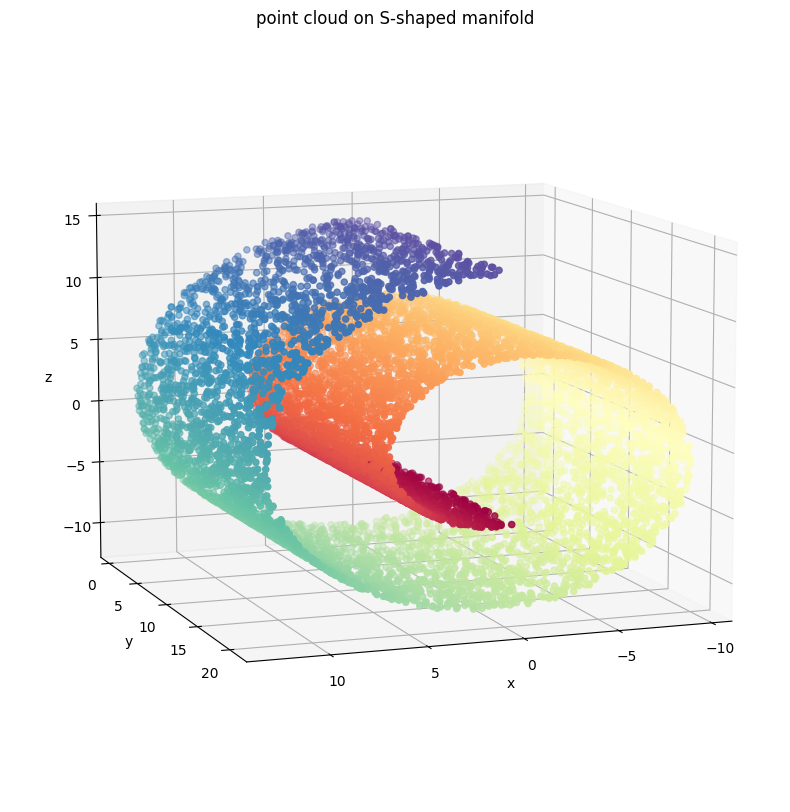

In [ ]:
rng = np.random.default_rng(1)
nr_samples = 100000

nr_samples_plot = 10000
idx_plot = rng.permutation(nr_samples_plot)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)
print(X.shape)
print(type(X))

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [ ]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.03631293414357644, cut-off=0.8178685510123183


(<Figure size 1500x1500 with 8 Axes>,
 array([[<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>]],
       dtype=object))

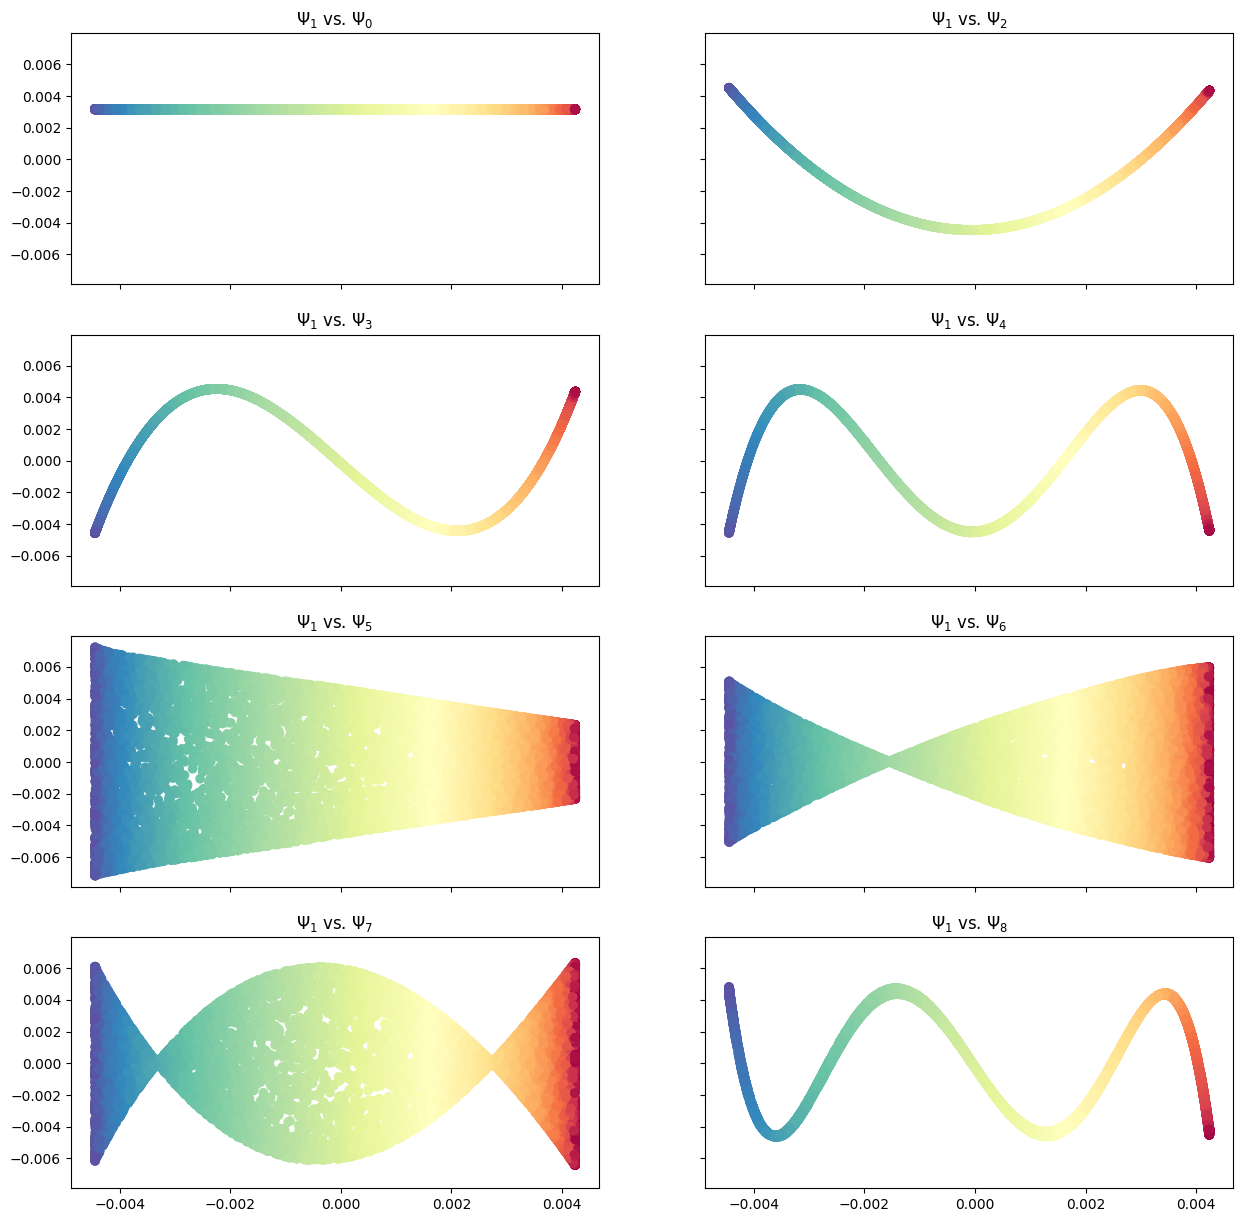

In [ ]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(
        epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
    ),
    n_eigenpairs=9,
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

In [ ]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


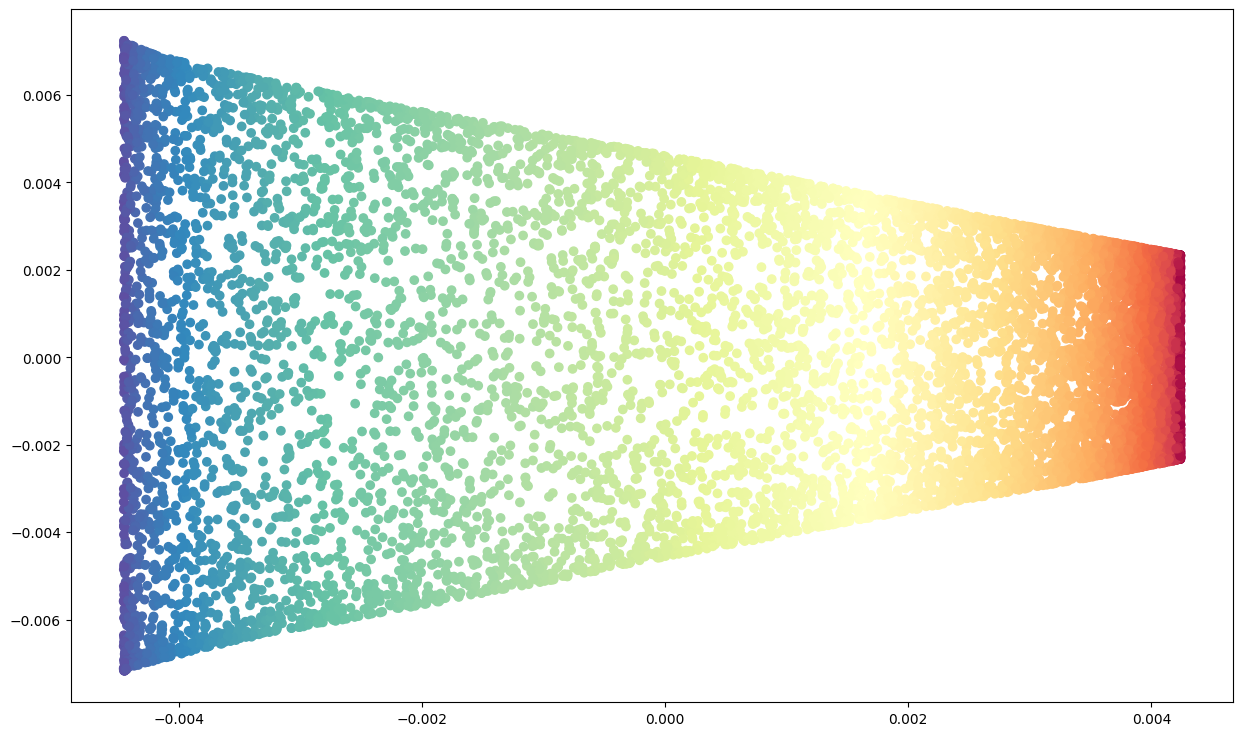

In [ ]:
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

In [ ]:
target_mapping.shape

(100000, 2)

In [ ]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(X), batch_size):
    s_curve_batch = X[i:i+batch_size]
    target_mapping_batch = target_mapping[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9992060984787828


# Datafold Scalable Embedding via Landmark Diffusion on Swiss roll dataset (100k points)

(100000, 3)
<class 'numpy.ndarray'>


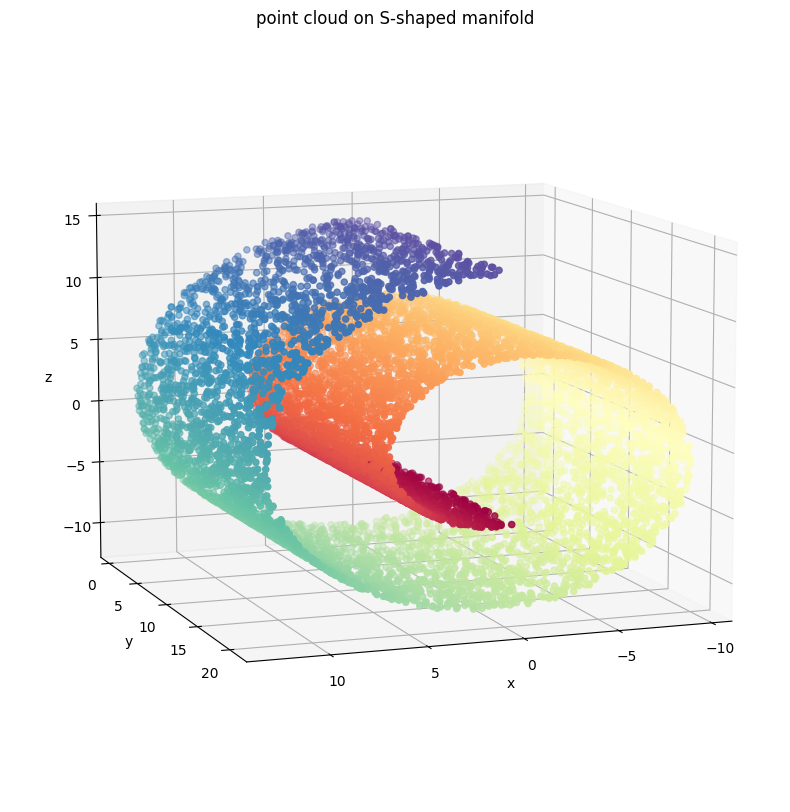

In [ ]:
rng = np.random.default_rng(1)
nr_samples = 100000

nr_samples_plot = 10000
idx_plot = rng.permutation(nr_samples_plot)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)
print(X.shape)
print(type(X))

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [ ]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.023092890518197837, cut-off=0.6522168072740591


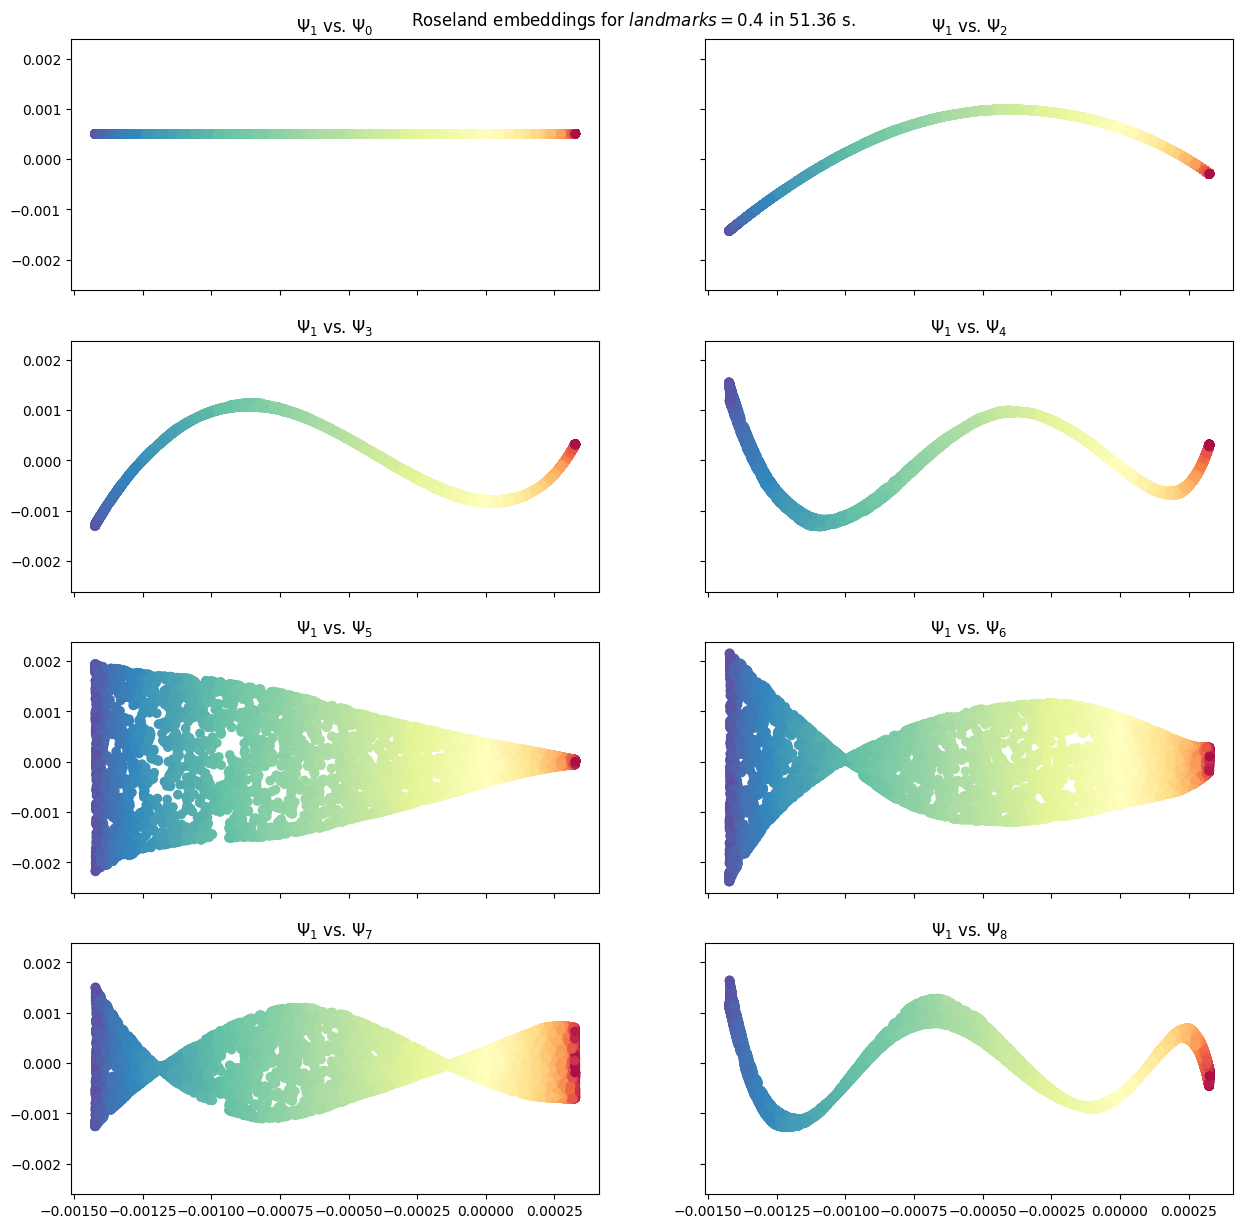

In [ ]:
lm = 0.4
rose = dfold.Roseland(
        kernel=pfold.GaussianKernel(
            epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
        ),
        n_svdtriplet=9,
        landmarks=lm,
    )
t0 = time.time()
rose = rose.fit(X_pcm)
dt = time.time() - t0
svdvecs, svdvals = rose.svdvec_left_, rose.svdvalues_

plot_pairwise_eigenvector(
        eigenvectors=svdvecs[idx_plot, :],
        n=1,
        fig_params=dict(figsize=[15, 15]),
        scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

plt.suptitle(rf"Roseland embeddings for $landmarks={lm}$ in {dt:.2f} s.", y=0.9)
plt.show()

In [ ]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=1000, strategy="dim"
).fit(svdvecs)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


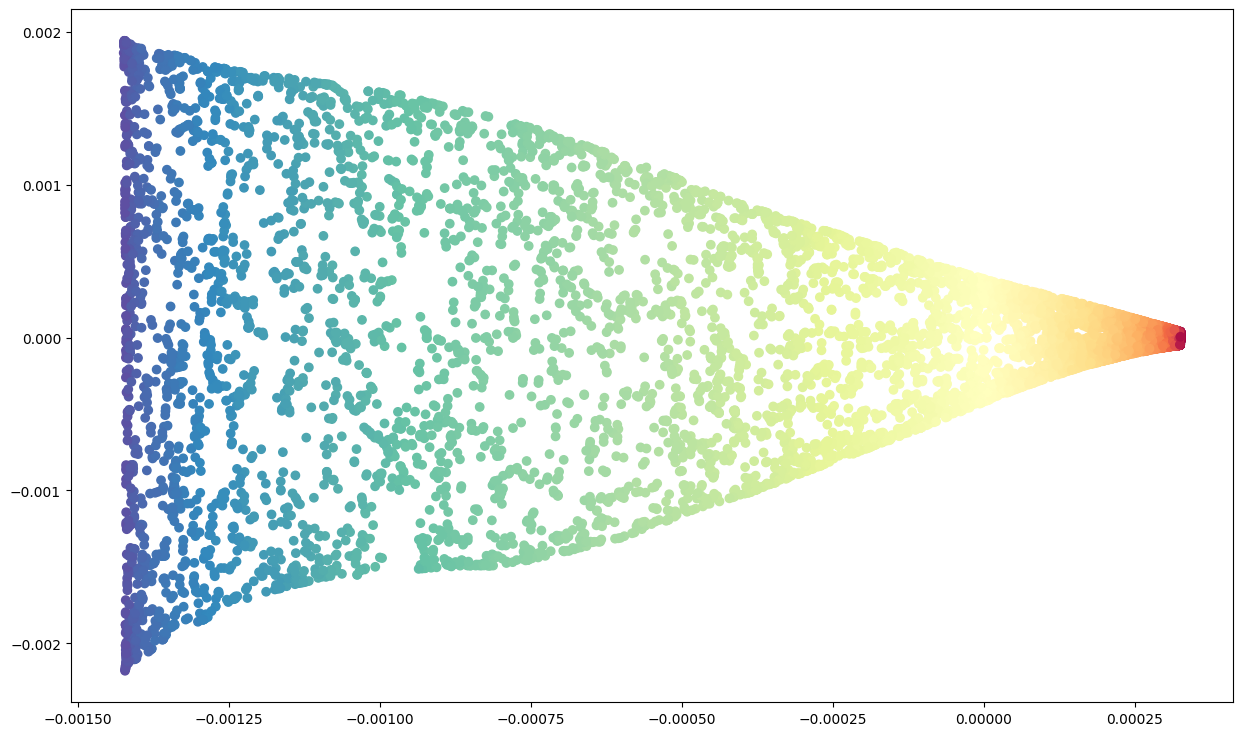

In [ ]:
target_mapping = selection.transform(svdvecs)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

In [ ]:
target_mapping.shape

(100000, 2)

In [ ]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(X), batch_size):
    s_curve_batch = X[i:i+batch_size]
    target_mapping_batch = target_mapping[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9993431393114491


# Datafold Scalable Embedding via Landmark Diffusion on Swiss roll dataset (1M points)

(1000000, 3)
<class 'numpy.ndarray'>


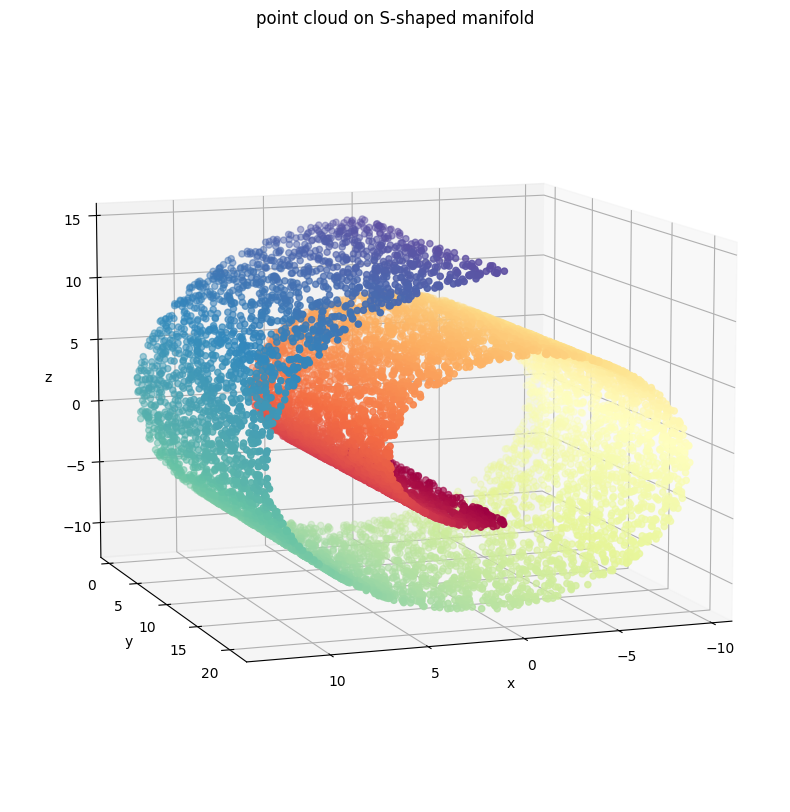

In [ ]:
rng = np.random.default_rng(1)
nr_samples = 1000000

nr_samples_plot = 10000
idx_plot = rng.permutation(nr_samples_plot)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)
print(X.shape)
print(type(X))

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [ ]:
X_pcm = pfold.PCManifold(X)
# X_pcm.optimize_parameters()

# print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

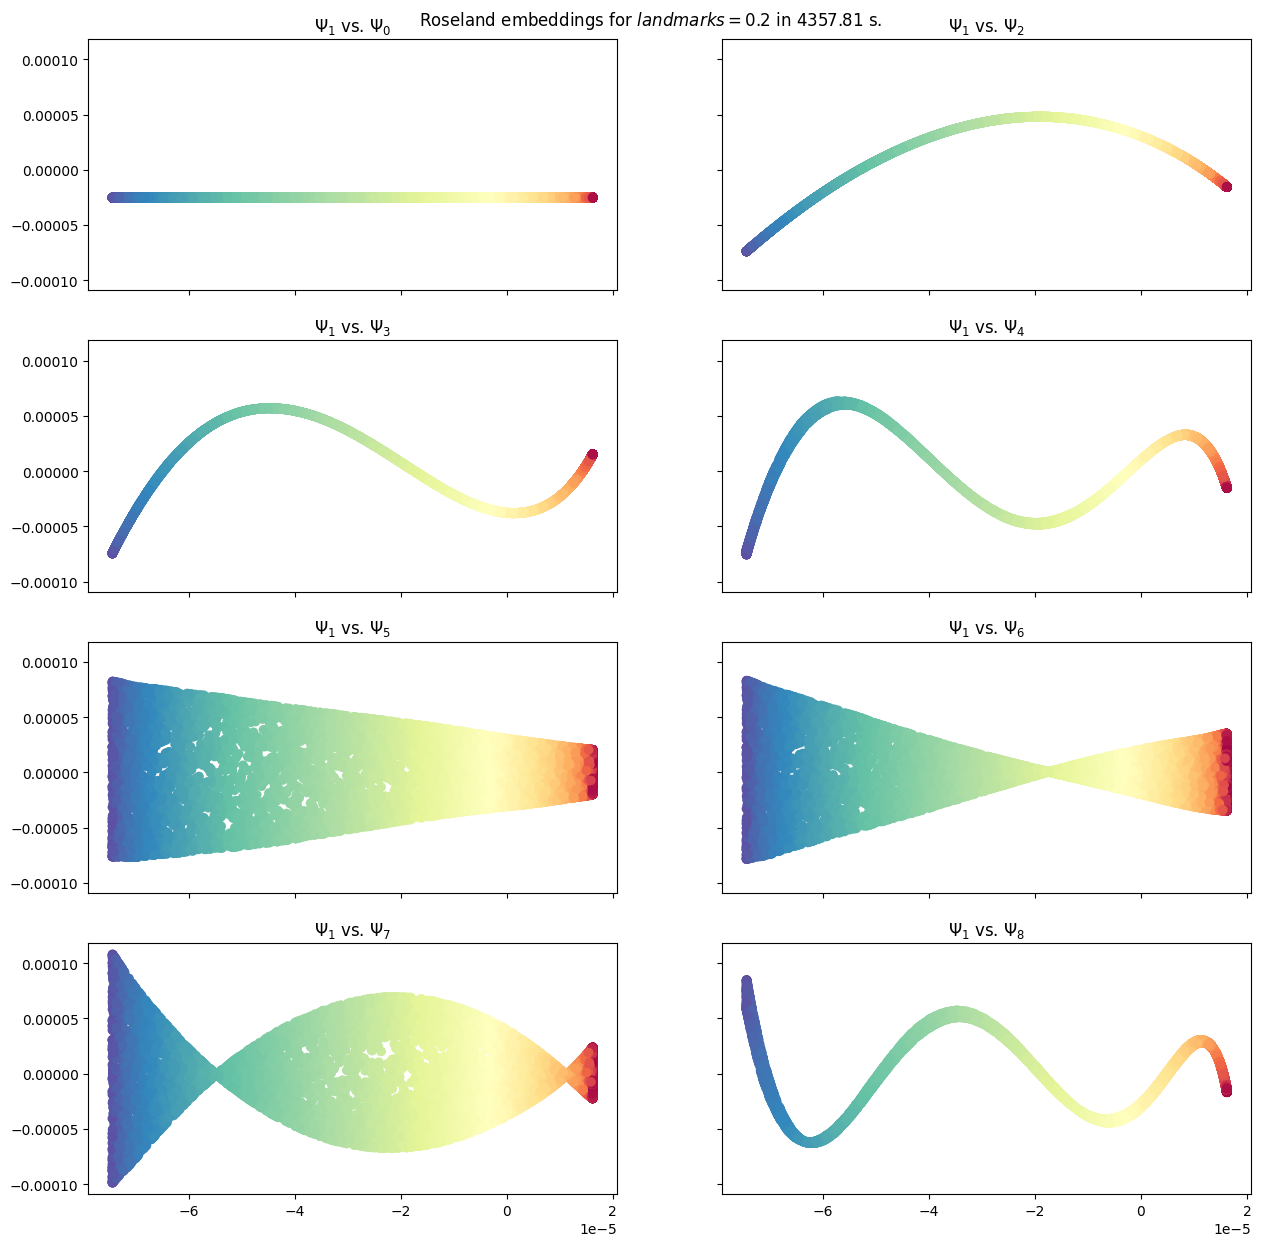

In [ ]:
lm = 0.2
rose = dfold.Roseland(
        kernel=pfold.GaussianKernel(
            epsilon=0.023092890518197837, distance=dict(cut_off=0.6522168072740591)
        ),
        n_svdtriplet=9,
        landmarks=lm,
    )
t0 = time.time()
rose = rose.fit(X_pcm)
dt = time.time() - t0
svdvecs, svdvals = rose.svdvec_left_, rose.svdvalues_

plot_pairwise_eigenvector(
        eigenvectors=svdvecs[idx_plot, :],
        n=1,
        fig_params=dict(figsize=[15, 15]),
        scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

plt.suptitle(rf"Roseland embeddings for $landmarks={lm}$ in {dt:.2f} s.", y=0.9)
plt.show()

In [ ]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=1000, strategy="dim"
).fit(svdvecs)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


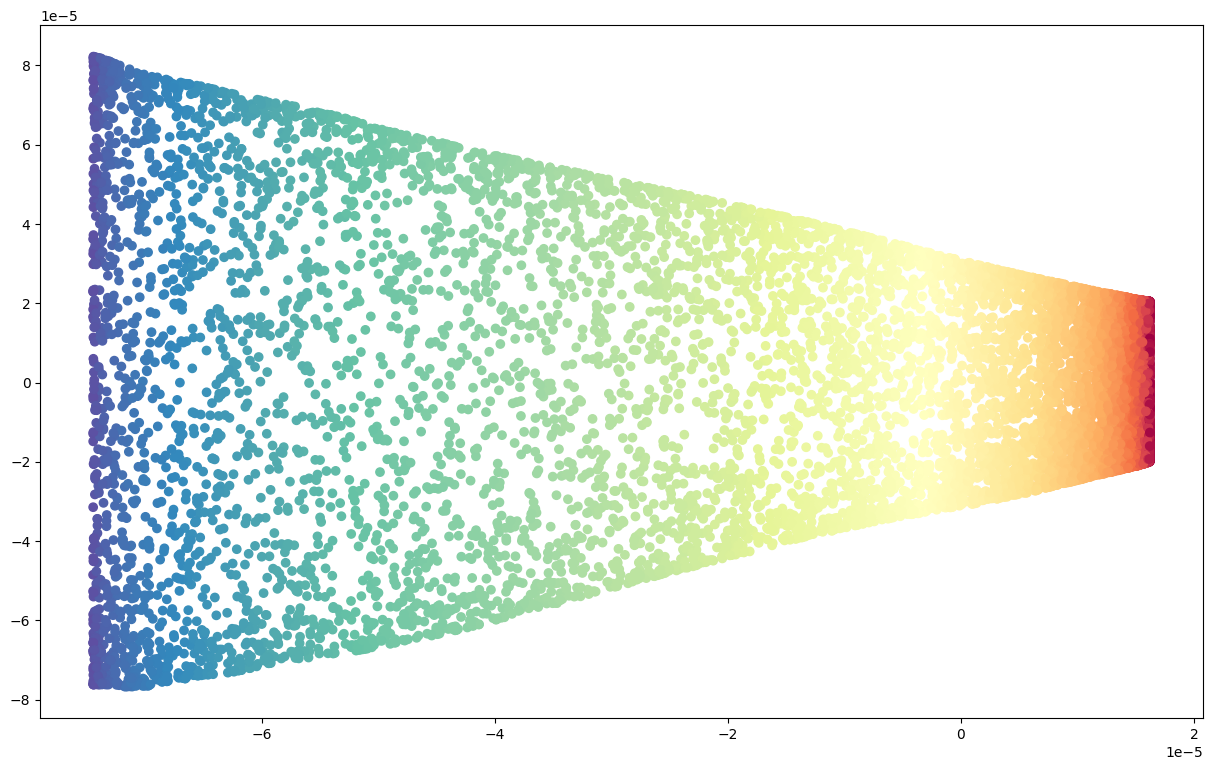

In [ ]:
target_mapping = selection.transform(svdvecs)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

In [ ]:
target_mapping.shape

(1000000, 2)

In [ ]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(X), batch_size):
    s_curve_batch = X[i:i+batch_size]
    target_mapping_batch = target_mapping[i:i+batch_size]
    trustworthiness_score = trustworthiness(s_curve_batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9989213476781424


# Datafold Diffusion Maps on Google news word2vec dataset (10k points)

In [ ]:
# Connecting to drive for colab implementation
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
binary_file_path = 'gdrive/MyDrive/GoogleNews-vectors-negative300.bin'
# Load the Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(binary_file_path, binary=True)
print("Number of rows: ", len(word2vec_model.index_to_key))
print("Dimensions of word vectors: ", word2vec_model.vector_size)

Number of rows:  3000000
Dimensions of word vectors:  300


In [ ]:
# Get a random subset of 100,000 words from the vocabulary
subset_words = random.sample(list(word2vec_model.key_to_index.keys()), 10000)

# Get the word vectors for the subset
subset_word_vectors = [word2vec_model[word] for word in subset_words]
subset_word_vectors = np.array(subset_word_vectors)

print(subset_word_vectors.shape)

(10000, 300)


In [ ]:
word_pcm = pfold.PCManifold(subset_word_vectors)
word_pcm.optimize_parameters()

print(f"epsilon={word_pcm.kernel.epsilon}, cut-off={word_pcm.cut_off}")

epsilon=2.0046904754190575, cut-off=6.076821804046631


In [ ]:
rng = np.random.default_rng(1)
nr_samples = 10000
idx_plot = rng.permutation(nr_samples)[:nr_samples]

/usr/local/lib/python3.10/dist-packages/datafold/utils/plot.py:257: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  _ax.scatter(


Execution time: 116.05027747154236 seconds


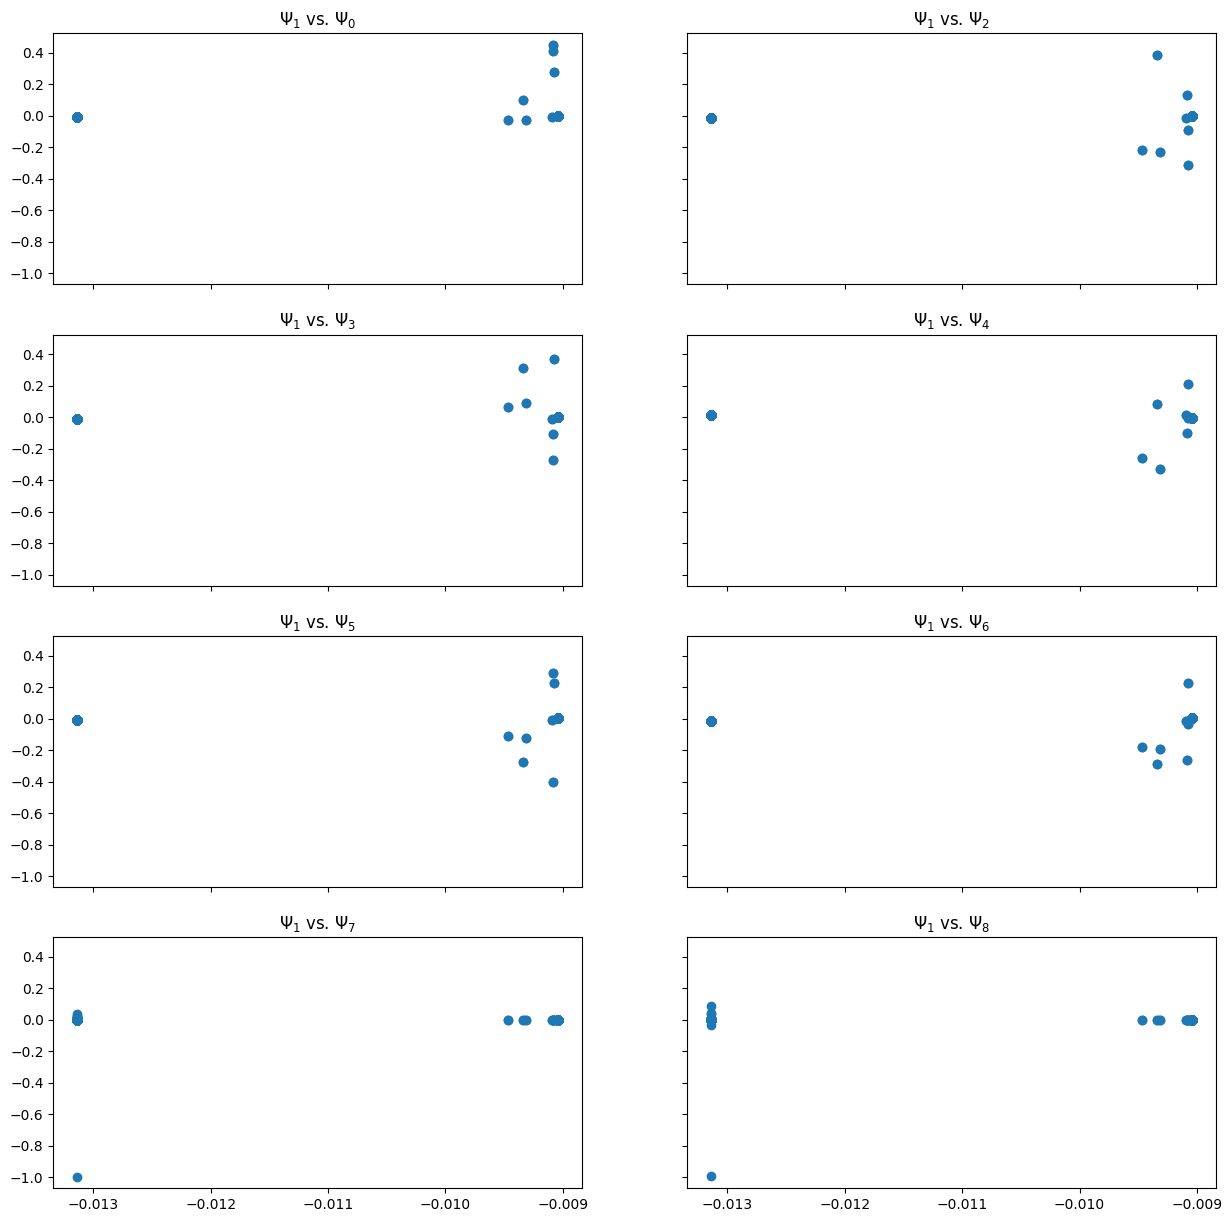

In [ ]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(
        epsilon=0.1, distance=dict(cut_off=1)
    ),
    n_eigenpairs=9,
)
start_time = time.time()
dmap = dmap.fit(word_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_
end_time = time.time()

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral),
)

elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time} seconds")

In [12]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 7]


<ipython-input-9-f6a5290fd9a6>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


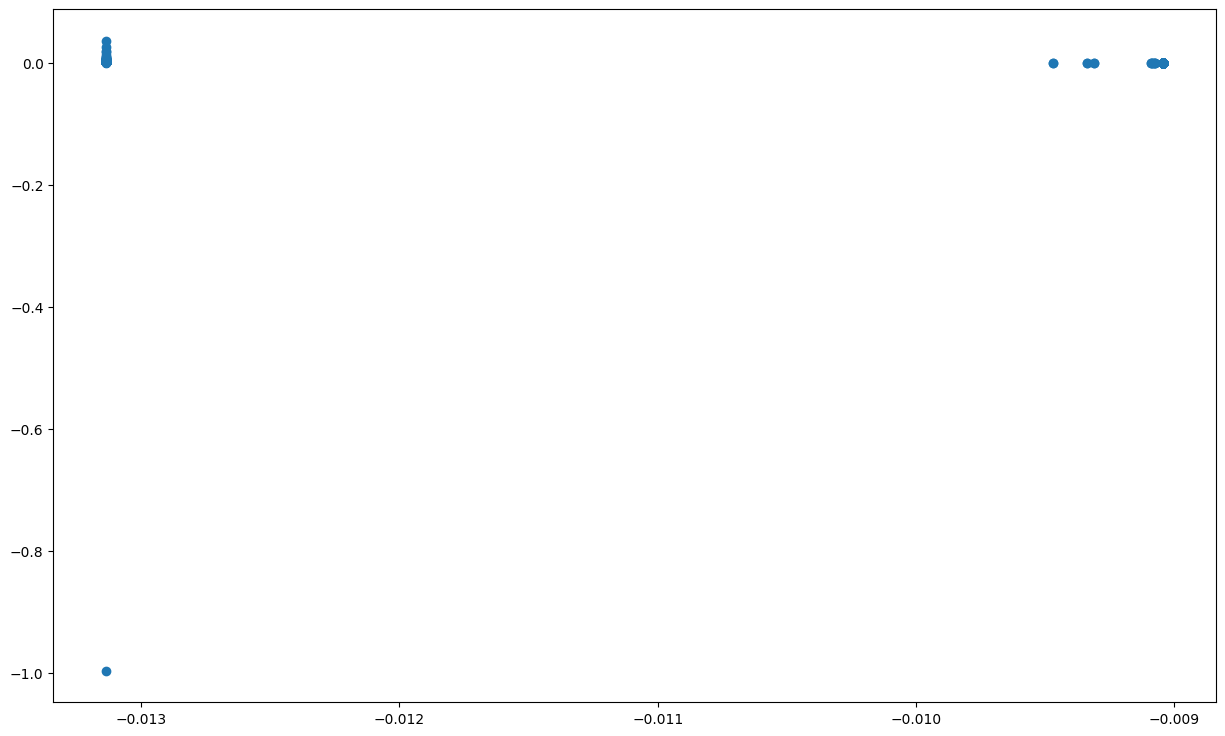

In [9]:
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    cmap=plt.cm.Spectral,
);

In [11]:
batch_size = 10000  # or any other suitable value
trustworthiness_scores = []

for i in range(0, len(subset_word_vectors), batch_size):
    batch = subset_word_vectors[i:i+batch_size]
    target_mapping_batch = target_mapping[i:i+batch_size]
    trustworthiness_score = trustworthiness(batch, target_mapping_batch)
    trustworthiness_scores.append(trustworthiness_score)

overall_trustworthiness = np.mean(trustworthiness_scores)
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.5767289251401121
